In [957]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [958]:
# Reading the CSV file
df = pd.read_csv("/Users/ruthvik/Downloads/Python Project/MissingMigrants-Global-2019-03-29T18-36-07.csv")
df.head(10) # Print top 10 rows in the data frame

,Web ID,Region of Incident,Reported Date,Reported Year,Reported Month,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Location Description,Information Source,Location Coordinates,Migration Route,URL,UNSD Geographical Grouping,Source Quality
0,51849,US-Mexico Border,9-Jul-19,2019,Jul,1.0,NaN,1,NaN,NaN,1.0,NaN,Unknown,"Near Mercado Zaragoza, Piedras Negras, Coahuil...",Zócalo,"28.700944700000, -100.514561000000",NaN,http://bit.ly/32mdMSQ,Central America,1
1,51847,US-Mexico Border,8-Jul-19,2019,Jul,1.0,NaN,1,NaN,NaN,1.0,NaN,Drowning,"Morelos Dam, Vicente Guerrero, Mexicali, Baja ...","Uni Mexicali, El Imparcial, Radio Patr","32.705302900000, -114.728829800000",NaN,"http://bit.ly/2XwZbR6, http://bit.ly/32bOneN, ...",Central America,3
2,51848,Caribbean,8-Jul-19,2019,Jul,8.0,NaN,8,8.0,3.0,5.0,NaN,Vehicle Accident,Van fell into irrigation canal near Barrero Ad...,"Listin Diario, EFE, Noticias Sin","19.559433200000, -70.869348600000",NaN,"http://bit.ly/2XCuDNV, http://bit.ly/2XDMQL7, ...",Caribbean,3
3,51850,South America,8-Jul-19,2019,Jul,1.0,NaN,1,NaN,NaN,1.0,NaN,Presumed vehicle accident,"Near Pan-American Highwaay, La Legua, Piura, Peru",Diario Peru,"-5.227319800000, -80.655000100000",NaN,"https://bit.ly/30CDJfB, https://bit.ly/2XB0PB6",South America,3
4,51830,Europe,6-Jul-19,2019,Jul,1.0,NaN,1,7.0,NaN,1.0,NaN,Fell from truck,"A29 motorway, near the Hellegatsplein junction...","NOS, Hart van Nederland","51.708842167962, 4.396572521430",NaN,"http://bit.ly/2XPgn8K, http://bit.ly/2xL1CoR",Western Europe,3
5,51831,Central America,6-Jul-19,2019,Jul,1.0,NaN,1,9.0,1.0,NaN,NaN,Vehicle Accident,"Federal highway 180 near Alvarado, Veracruz, M...","El Imparcial, Telediario","18.769659288645, -95.744834624192",NaN,"http://bit.ly/2YOi57D, http://bit.ly/2L7VcZu",Central America,3
6,51846,Central America,6-Jul-19,2019,Jul,1.0,NaN,1,4.0,NaN,1.0,NaN,"Tortured, Murdered",Body recovered near local road Yecapixtla-Cruz...,"Movimiento Migrante Mesoamericano, Proceso","18.877658400000, -98.773932400000",NaN,"http://bit.ly/2JvUvWL, http://bit.ly/2NFM68k, ...",Northern America,4
7,51829,US-Mexico Border,5-Jul-19,2019,Jul,1.0,NaN,1,36.0,NaN,1.0,NaN,Unknown,"Hospital in Tucson, Pima County, Arizona, USA ...",US Border Patrol,"32.242930100000, -110.946201300000",Central America to US,http://bit.ly/2S1f2Gf,Northern America,5
8,51828,US-Mexico Border,4-Jul-19,2019,Jul,1.0,NaN,1,NaN,1.0,NaN,NaN,Unknown,"Ejido Jerónimo, 3km south of the Santa Teresa ...","El Diario, Norte Digital","31.773019723835, -106.701209668170",Central America to US,"http://bit.ly/30nK525, http://bit.ly/2XvOQK1",Central America,3
9,51821,Mediterranean,3-Jul-19,2019,Jul,32.0,51.0,83,3.0,4.0,9.0,1.0,"Presumed drowning, Hypothermia","Off the coast of Zarzis, Tunisia - departed fr...",IOM Tunisia,"33.618682016579, 11.439711900000",Central Mediterranean,NaN,Uncategorized,4


In [959]:
df.shape # outputs number of rows and columns

(5560, 20)

In [960]:
df.info() # Information of all the variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5560 entries, 0 to 5559
Data columns (total 20 columns):
Web ID                                 5560 non-null int64
Region of Incident                     5560 non-null object
Reported Date                          5560 non-null object
Reported Year                          5560 non-null int64
Reported Month                         5560 non-null object
Number Dead                            5355 non-null float64
Minimum Estimated Number of Missing    530 non-null float64
Total Dead and Missing                 5560 non-null int64
Number of Survivors                    816 non-null float64
Number of Females                      950 non-null float64
Number of Males                        2965 non-null float64
Number of Children                     673 non-null float64
Cause of Death                         5558 non-null object
Location Description                   5551 non-null object
Information Source                     5558 non-null o

In [961]:
df.dtypes #column names and their data types

Web ID                                   int64
Region of Incident                      object
Reported Date                           object
Reported Year                            int64
Reported Month                          object
Number Dead                            float64
Minimum Estimated Number of Missing    float64
Total Dead and Missing                   int64
Number of Survivors                    float64
Number of Females                      float64
Number of Males                        float64
Number of Children                     float64
Cause of Death                          object
Location Description                    object
Information Source                      object
Location Coordinates                    object
Migration Route                         object
URL                                     object
UNSD Geographical Grouping              object
Source Quality                           int64
dtype: object

In [962]:
df.dtypes.value_counts() # data types and their respective counts

object     10
float64     6
int64       4
dtype: int64

In [963]:
# finding percentage of missing values
missingvalues = round(df.isnull().sum()*100/len(df),2)
missingvalues

Web ID                                  0.00
Region of Incident                      0.00
Reported Date                           0.00
Reported Year                           0.00
Reported Month                          0.00
Number Dead                             3.69
Minimum Estimated Number of Missing    90.47
Total Dead and Missing                  0.00
Number of Survivors                    85.32
Number of Females                      82.91
Number of Males                        46.67
Number of Children                     87.90
Cause of Death                          0.04
Location Description                    0.16
Information Source                      0.04
Location Coordinates                    0.02
Migration Route                        47.93
URL                                    38.94
UNSD Geographical Grouping              0.20
Source Quality                          0.00
dtype: float64

In [964]:
# Changing string to datetime format
df['Reported Date']=pd.to_datetime(df['Reported Date'])


In [965]:
# Splitting coordinates column into latitude and longitude 
df[['latitude', 'longitude']] = df["Location Coordinates"].str.split(",",  expand = True) 
df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)

In [966]:
# Drop the columns not required for analysis
df = df.drop(['Web ID', 'URL' , 'Location Description', 'Information Source'], axis = 1)

In [967]:
# Descriptive Analytics for numeric variables
descriptive_numeric= df.describe(percentiles = [0.01, 0.05,0.25,0.50,0.75,0.95,0.99], include = ['int64','float64'])
descriptive_numeric.round(2)

,Reported Year,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Source Quality,latitude,longitude
count,5560.00,5355.00,530.00,5560.00,816.00,950.00,2965.00,673.00,5560.00,5559.00,5559.00
mean,2016.75,3.24,28.33,5.82,59.58,1.98,1.87,2.44,2.93,26.39,-19.80
std,1.30,13.35,66.36,27.54,141.09,2.92,5.39,10.00,1.42,11.13,62.66
min,2014.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,-33.52,-119.63
1%,2014.00,1.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,-12.55,-115.54
5%,2015.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,7.86,-113.01
25%,2016.00,1.00,2.00,1.00,4.00,1.00,1.00,1.00,2.00,19.64,-98.38
50%,2017.00,1.00,7.00,1.00,14.00,1.00,1.00,1.00,2.00,28.42,12.37
75%,2018.00,2.00,25.00,3.00,54.00,2.00,1.00,2.00,4.00,32.89,27.10
95%,2019.00,10.00,117.55,20.00,269.25,6.00,4.00,6.00,5.00,40.65,47.92


In [968]:
#  Descriptive statistics for numeric variables
descriptive_categorical = df.describe (include = 'object')
descriptive_categorical

,Region of Incident,Reported Month,Cause of Death,Location Coordinates,Migration Route,UNSD Geographical Grouping
count,5560,5560,5558,5559,2895,5549
unique,15,12,249,3732,15,20
top,US-Mexico Border,Jun,Drowning,"31.965203600000, -113.011894500000",Central America to US,Northern Africa
freq,1455,584,1038,156,1695,1244


In [969]:
# Imputing missing values by 0 for the below mentioned columns 
df['Number Dead'] = df['Number Dead'].fillna(0)
df['Minimum Estimated Number of Missing'] = df['Minimum Estimated Number of Missing'].fillna(0)
df['Number of Survivors'] = df['Number of Survivors'].fillna(0)
df['Number of Females'] = df['Number of Females'].fillna(0)
df['Number of Males'] = df['Number of Males'].fillna(0)
df['Number of Children'] = df['Number of Children'].fillna(0)

In [970]:
# Adding unidentified 
df['Unidentified'] = df['Number Dead'] - (df['Number of Females']+df['Number of Males']+df['Number of Children'])

In [971]:
# finding percentage of missing values
missingvalues = round(df.isnull().sum()*100/len(df),2)
missingvalues

Region of Incident                      0.00
Reported Date                           0.00
Reported Year                           0.00
Reported Month                          0.00
Number Dead                             0.00
Minimum Estimated Number of Missing     0.00
Total Dead and Missing                  0.00
Number of Survivors                     0.00
Number of Females                       0.00
Number of Males                         0.00
Number of Children                      0.00
Cause of Death                          0.04
Location Coordinates                    0.02
Migration Route                        47.93
UNSD Geographical Grouping              0.20
Source Quality                          0.00
latitude                                0.02
longitude                               0.02
Unidentified                            0.00
dtype: float64

In [972]:
# Using groupby statement 
causeofdeath=df.groupby(['Cause of Death']).agg({"Number Dead":[sum]}).rename(columns = {'sum' : ''})


In [973]:
#BEGIN grouping the low frequency causes into one thereby reducing 249 causes to 10
#Added this to handle blank, leading and trailing spaces in the new file
df['Cause of Death']=df['Cause of Death'].fillna('Unknown')
df['Cause of Death']=df['Cause of Death'].str.strip()

df.loc[df['Cause of Death'].str.contains("hit by",case=False),'Cause of Death - Grouped'] = "Accident"
df.loc[df['Cause of Death'].str.contains("fell from",case=False),'Cause of Death - Grouped'] = "Accident"
df.loc[df['Cause of Death'].str.contains("fall into",case=False),'Cause of Death - Grouped'] = "Accident"
df.loc[df['Cause of Death'].str.contains("fall from",case=False),'Cause of Death - Grouped'] = "Accident"
df.loc[df['Cause of Death'].str.contains("accident",case=False),'Cause of Death - Grouped'] = "Accident"
df.loc[df['Cause of Death'].str.lower()=="dehydration",'Cause of Death - Grouped'] = "Dehydration/Starvation"
df.loc[df['Cause of Death'].str.contains("shot",case=False),'Cause of Death - Grouped'] = "Killed"
df.loc[df['Cause of Death'].str.contains("stabbed",case=False),'Cause of Death - Grouped'] = "Killed"
df.loc[df['Cause of Death'].str.contains("murdered",case=False),'Cause of Death - Grouped'] = "Killed"
df.loc[df['Cause of Death'].str.contains("crushed ",case=False),'Cause of Death - Grouped'] = "Killed"
df.loc[df['Cause of Death'].str.contains("electrocution",case=False),'Cause of Death - Grouped'] = "Killed"
df.loc[df['Cause of Death'].str.lower()=="starvation",'Cause of Death - Grouped'] = "Dehydration/Starvation"
df.loc[df['Cause of Death'].str.lower()=="suffocation",'Cause of Death - Grouped'] = "Asphyxiation"
df.loc[df['Cause of Death'].str.lower()=="asphyxiation",'Cause of Death - Grouped'] = "Asphyxiation"
df.loc[df['Cause of Death'].str.lower()=="starvation, dehydration",'Cause of Death - Grouped'] = "Dehydration/Starvation"
df.loc[df['Cause of Death'].str.contains("harsh weather",case=False),'Cause of Death - Grouped'] = "Harsh Weather"
df.loc[df['Cause of Death'].str.contains("harsh conditions",case=False),'Cause of Death - Grouped'] = "Harsh Weather"
df.loc[df['Cause of Death'].str.contains("hypothermia",case=False),'Cause of Death - Grouped'] = "Harsh Weather"
df.loc[df['Cause of Death'].str.contains("hyperthermia",case=False),'Cause of Death - Grouped'] = "Harsh Weather"
df.loc[df['Cause of Death'].str.lower()=="presumed drowning", 'Cause of Death - Grouped'] = 'Drowning'
df.loc[df['Cause of Death'].str.lower()=="presumed drowing", 'Cause of Death - Grouped'] = 'Drowning'
#To overwrite miscellaneous cases here with "Mixed" which has length greater than 25
df.loc[df['Cause of Death'].str.len()>25, 'Cause of Death - Grouped'] = 'Mixed'
df.loc[df['Cause of Death'].str.contains("unknown",case=False),'Cause of Death - Grouped'] = "Unknown"
df.loc[df['Cause of Death'].str.contains("helicopter",case=False),'Cause of Death - Grouped'] = "Killed"
#To overwrite miscellaneous with main categories
df.loc[df['Cause of Death'].str.lower()=="mixed", 'Cause of Death - Grouped'] = 'Mixed'
df.loc[df['Cause of Death'].str.lower()=="sickness and lack of access to medicines",'Cause of Death - Grouped'] = "Lack of medicines"
df.loc[df['Cause of Death'].str.lower()=="accident",'Cause of Death - Grouped'] = "Accident"
df.loc[df['Cause of Death'].str.lower()=="drowning", 'Cause of Death - Grouped'] = 'Drowning'
#END


In [974]:
# To find the missing value counts
df["Cause of Death - Grouped"].isnull().value_counts()

False    5329
True      231
Name: Cause of Death - Grouped, dtype: int64

In [975]:
 # Fill other missing values by others
df["Cause of Death - Grouped"]= df["Cause of Death - Grouped"].fillna("Others")

In [976]:
df.groupby(['Cause of Death - Grouped']).agg({"Number Dead" : [sum]}).rename(columns = {'sum' : ''}).sort_values("Number Dead", ascending = False)


,Number Dead
,
Cause of Death - Grouped,
Drowning,7364.0
Mixed,1792.0
Unknown,1769.0
Lack of medicines,1744.0
Accident,1573.0
Dehydration/Starvation,873.0
Killed,806.0
Others,631.0


In [977]:
df['Region of Incident'].value_counts()

US-Mexico Border      1455
North Africa          1245
Mediterranean         1022
Sub-Saharan Africa     477
Central America        335
Europe                 262
Horn of Africa         235
Middle East            176
South Asia             152
Southeast Asia          99
Caribbean               65
South America           29
East Asia                5
North America            2
Central Asia             1
Name: Region of Incident, dtype: int64

In [978]:
# Grouping Region of Incidents
df.loc[df['Region of Incident'].isin(['North America', 'South America', 'Central America' , 'US-Mexico Border', 'Caribbean']), "Region of Incident - Grouped"] = "Americas"
df.loc[df['Region of Incident'].isin(['North Africa', 'Sub-Saharan Africa', 'Horn of Africa']), "Region of Incident - Grouped"] = "Africa"
df.loc[df['Region of Incident'].isin(['Europe']), "Region of Incident - Grouped"] = "Europe"
df.loc[df['Region of Incident'].isin(['Mediterranean']),"Region of Incident - Grouped"] = "Mediterranean"
df.loc[df['Region of Incident'].isin(['Middle East']),"Region of Incident - Grouped"] = "Middle East"
df.loc[df['Region of Incident'].isin(['South Asia','Southeast Asia','East Asia','Central Asia']),"Region of Incident - Grouped"] = "Asia"


In [979]:
# Migration Route Manipulation
df['Migration Route'].value_counts()

Central America to US                        1695
Central Mediterranean                         506
Western Mediterranean                         279
Eastern Mediterranean                         237
Western Balkans                                69
Calais to United Kingdom                       51
Western African                                19
Horn Africa to Yemen                           15
Italy to France                                 9
Darien Gap                                      7
Caribbean to Central America                    3
Dominican Republic to Puerto Rico               2
From Haiti to Dajabon, Dominican Republic       1
Malaysia to Indonesia                           1
Venezuela to Curaçao                            1
Name: Migration Route, dtype: int64

In [980]:
df['Migration Route'].isnull().sum()

2665

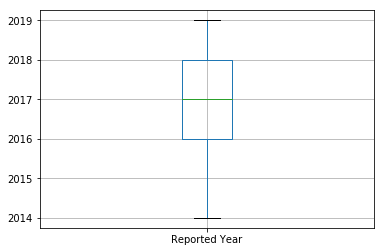

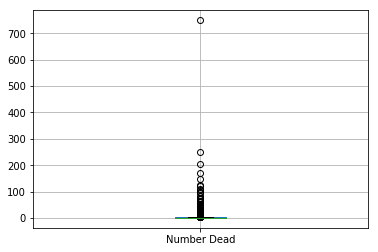

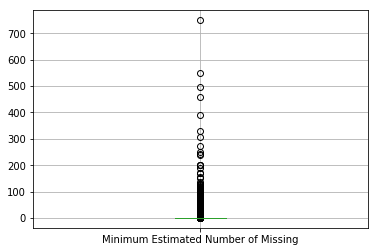

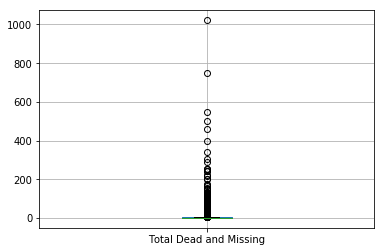

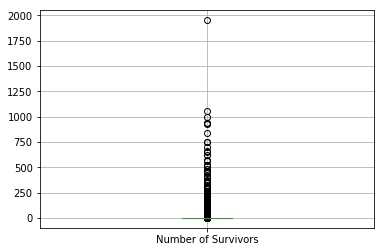

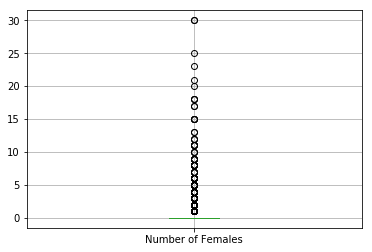

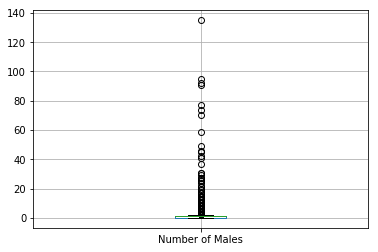

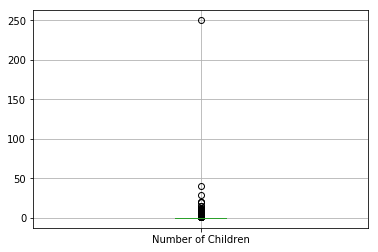

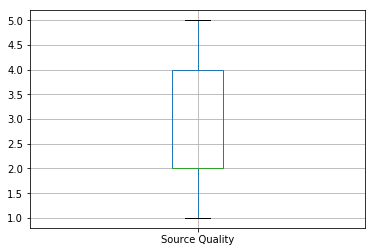

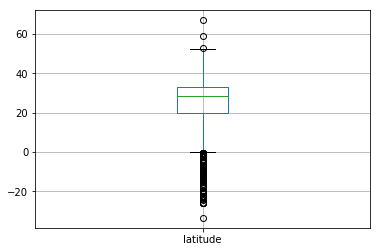

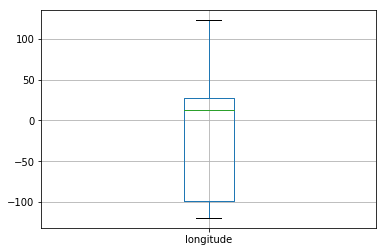

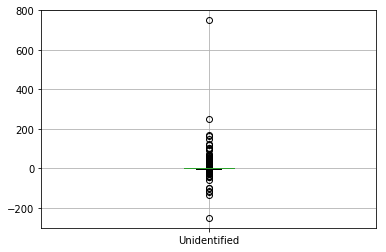

In [981]:
# Saving box plots for each of the numeric variables
for column in df : 
    if df[column].dtype in ['int64','float64']:
        myfig = plt.figure()
        df.boxplot([column])
        plt.tight_layout
        plt.savefig("/Users/ruthvik/Downloads/Python Project/Graph_" + str([column])+ ".png", format = "PNG")


In [982]:
# Adding month column
df['Month'] = pd.DatetimeIndex(df['Reported Date']).month

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:3111: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



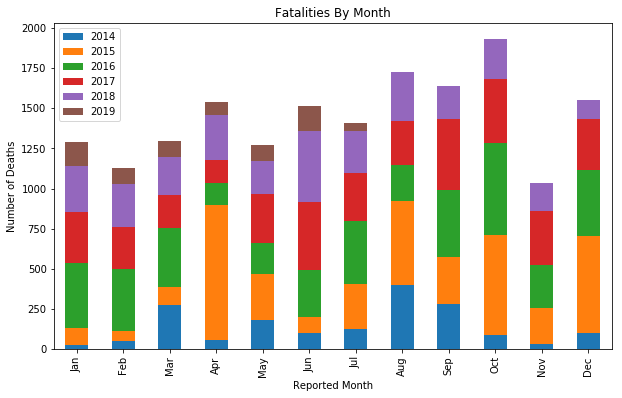

In [983]:
# Trends of deaths by months 
#BEGIN Changed legend values and stacked=true in plot
dfnew = df.groupby(['Reported Month','Month','Reported Year']).agg({"Number Dead" : [sum]}).unstack().reset_index()
dfnew = dfnew.sort_values(by = 'Month')
dfnew = dfnew.drop(['Month'], axis = 1)
dfnew = dfnew.set_index('Reported Month')


stacked = dfnew.plot.bar(stacked = 'True', figsize = (10,6), width = 0.5, title = "Fatalities By Month")
stacked.set_xlabel("Reported Month")
stacked.set_ylabel("Number of Deaths")
#BEGIN Changed legend values and stacked=true in plot
stacked.legend(['2014','2015','2016','2017','2018','2019']).set_visible(True)
#END



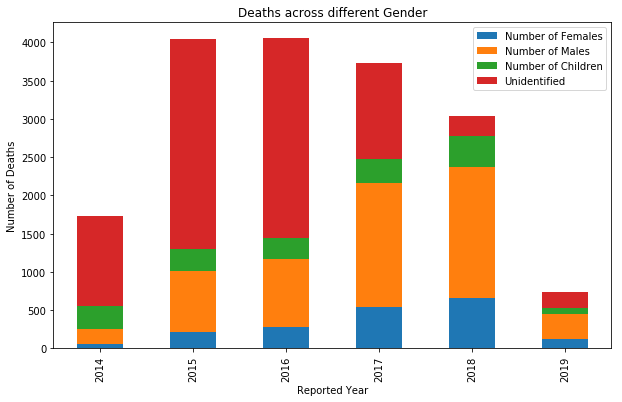

In [984]:
# Grouping by multiple variable and multiple numeric variables
Deaths_everyyear = df.groupby(['Reported Year']).agg({"Number of Females" : [sum],
                                                      "Number of Males" : [sum],
                                                      "Number of Children" : [sum],
                                                      "Unidentified" : [sum]}).reset_index().rename(columns = {'sum' : ''})
Deaths_everyyear = Deaths_everyyear.set_index('Reported Year')
graph = Deaths_everyyear.plot(kind = 'bar', stacked = True, figsize = (10,6), width = 0.5, title = "Deaths across different Gender")

graph.set_xlabel("Reported Year")
graph.set_ylabel("Number of Deaths")
#BEGIN Changed legend values and stacked=true in plot
graph.legend(['Number of Females','Number of Males','Number of Children','Unidentified'])

#END


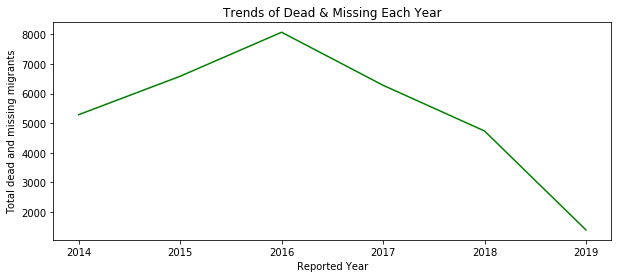

In [985]:
# Trend graph
dfline=df.groupby(['Reported Year']).agg({'Total Dead and Missing': [sum]}).plot(kind = 'line', figsize = [10,4], title = 'Trends of Dead & Missing Each Year' ,color = 'g')
dfline.set_xlabel('Reported Year')
dfline.set_ylabel('Total dead and missing migrants')
dfline.legend().set_visible(False)


In [986]:
# Subsetting 2016 data
data_2016 = df[df['Reported Year'] == 2016]

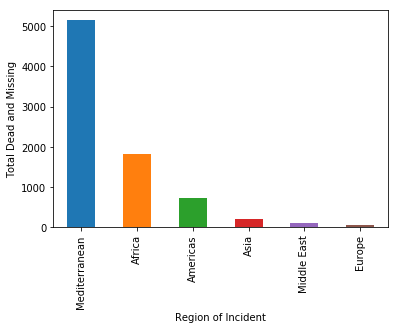

In [987]:
# Region of incidents in 2016 
regions = data_2016.groupby(['Region of Incident - Grouped']).agg({"Total Dead and Missing" : [sum]}).rename(columns = {"sum" : ""}).reset_index()
regions = regions.sort_values(by = ['Total Dead and Missing'], ascending = False)
graph = regions.plot.bar(x = 'Region of Incident - Grouped', y = 'Total Dead and Missing')
graph.set_xlabel('Region of Incident')
graph.set_ylabel('Total Dead and Missing')
graph.legend().set_visible(False)



In [988]:
# Cause of Death in 2016
causes = data_2016.groupby(['Cause of Death - Grouped']).agg({"Total Dead and Missing" : [sum]}).rename(columns = {"sum" : ""}).reset_index()
causes = causes.sort_values(by = ['Total Dead and Missing'], ascending = False)
causes['Percentage'] = round(causes['Total Dead and Missing']*100/causes['Total Dead and Missing'].sum(),2)
causes

,Cause of Death - Grouped,Total Dead and Missing,Percentage
,,,
3,Drowning,5033,62.37
6,Lack of medicines,1394,17.27
9,Unknown,778,9.64
0,Accident,234,2.90
7,Mixed,182,2.26
8,Others,110,1.36
2,Dehydration/Starvation,102,1.26
1,Asphyxiation,95,1.18
4,Harsh Weather,75,0.93


In [989]:
# Region of Incidents 
Region_of_Incident = df.groupby(['Region of Incident - Grouped']).agg({"Number Dead":[sum]}).rename(columns = {"sum" : ''}).reset_index()
Region_of_Incident


,Region of Incident - Grouped,Number Dead
,,
0,Africa,6119.0
1,Americas,3034.0
2,Asia,1100.0
3,Europe,436.0
4,Mediterranean,6205.0
5,Middle East,445.0


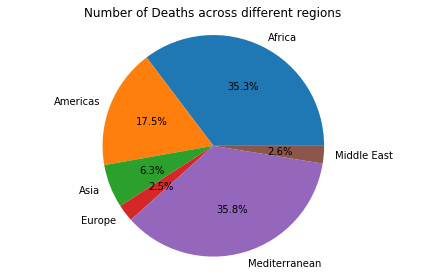

In [990]:
# Plotting Pie chart
plt.pie(
    Region_of_Incident['Number Dead'],
    labels=Region_of_Incident['Region of Incident - Grouped'],
    autopct='%1.1f%%',
    )
# View the plot drop above
plt.axis('equal')

# View the plot
plt.title("Number of Deaths across different regions")
plt.tight_layout()
plt.savefig('/Users/ruthvik/Downloads/Python Project/Pie Chart.png')

In [991]:
# Deep diving into the Mediterranean Region
mediterranean = df[df['Region of Incident - Grouped'] == 'Mediterranean']

In [992]:
# Deaths by route in the Mediterranean Region
Deaths_central = df[df['Migration Route'] == 'Central Mediterranean'].groupby("Reported Year").
                                          agg({"Number Dead" : [sum]}).reset_index().rename(columns = {'sum' : ''})
Deaths_eastern = df[df['Migration Route'] == 'Eastern Mediterranean'].groupby("Reported Year").
                                          agg({"Number Dead" : [sum]}).reset_index().rename(columns = {'sum' : ''})
Deaths_western = df[df['Migration Route'] == 'Western Mediterranean'].groupby("Reported Year").
                                          agg({"Number Dead" : [sum]}).reset_index().rename(columns = {'sum' : ''})

merged1= pd.merge(Deaths_central, Deaths_western, on="Reported Year", how="inner")
merged2= pd.merge(merged1, Deaths_eastern, on="Reported Year", how="inner")
merged2= merged2.set_index("Reported Year")

graph = merged2.plot.barh(stacked = True , figsize = (10,6), width = 0.5
                          , title = "Deaths across different routes in Mediterranean Region")
graph.set_xlabel("Number of Deaths")
graph.set_ylabel("Reported Year")
#BEGIN Changed legend values and stacked=true in plot
graph.legend(['Central Mediterranean', 'Eastern Mediterranean', 'Western Mediterranean']).set_visible(True)

SyntaxError: invalid syntax (<ipython-input-992-723c93947b3e>, line 2)

In [993]:
# Cross tabulation of Cause of Death and the Migration Route in the mediterranean region
ct = pd.crosstab(mediterranean['Cause of Death - Grouped'], mediterranean['Migration Route'], values=mediterranean['Number Dead'], aggfunc='sum',margins=True, margins_name='Total').fillna(0)
ct.sort_values(by = ['Total'], ascending = False)

Migration Route,Central Mediterranean,Eastern Mediterranean,Western Mediterranean,Total
Cause of Death - Grouped,,,,
Total,4521.0,1117.0,567.0,6205.0
Drowning,3627.0,1081.0,497.0,5205.0
Unknown,393.0,20.0,26.0,439.0
Others,172.0,11.0,15.0,198.0
Asphyxiation,172.0,2.0,1.0,175.0
Harsh Weather,74.0,3.0,7.0,84.0
Mixed,65.0,0.0,0.0,65.0
Killed,3.0,0.0,17.0,20.0
Dehydration/Starvation,10.0,0.0,0.0,10.0


In [994]:
# calculating attempted crossings in the Mediterranean Region
mediterranean['Attempted Crossings'] = mediterranean['Total Dead and Missing'] + mediterranean['Number of Survivors']

In [995]:
Deaths1_2016 = mediterranean[mediterranean['Reported Year'] == 2016 ].groupby("Reported Year").agg({"Number Dead" : [sum],"Minimum Estimated Number of Missing":[sum],
                                                                                                   "Number of Survivors":[sum]}).unstack().reset_index().rename(columns = {'sum' : ''})
Deaths1_2017 = mediterranean[mediterranean['Reported Year'] == 2017 ].groupby("Reported Year").agg({"Number Dead" : [sum],"Minimum Estimated Number of Missing":[sum],
                                                                                             "Number of Survivors":[sum]}).unstack().reset_index().rename(columns = {'sum' : ''})
Deaths1_2018 = mediterranean[mediterranean['Reported Year'] == 2018 ].groupby("Reported Year").agg({"Number Dead" : [sum],"Minimum Estimated Number of Missing":[sum],
                                                                                             "Number of Survivors":[sum]}).unstack().reset_index().rename(columns = {'sum' : ''})
Deaths1_2019 = mediterranean[mediterranean['Reported Year'] == 2019 ].groupby("Reported Year").agg({"Number Dead" : [sum],"Minimum Estimated Number of Missing":[sum],
                                                                                             "Number of Survivors":[sum]}).unstack().reset_index().rename(columns = {'sum' : ''})


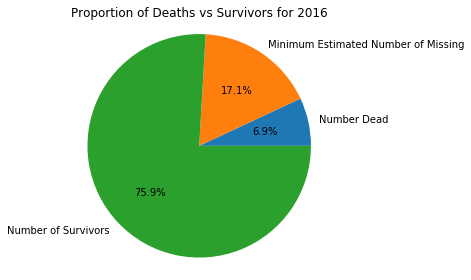

In [996]:
# plotting proportion of deaths vs survivors for 2016

plt.pie(
    Deaths1_2016[0],
    labels=Deaths1_2016['level_0'],
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')

# View the plot
plt.title("Proportion of Deaths vs Survivors for 2016")
plt.tight_layout()

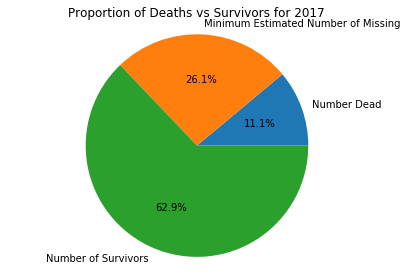

In [997]:
# plotting proportion of deaths vs survivors for 2017

plt.pie(
    Deaths1_2017[0],
    labels=Deaths1_2017['level_0'],
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')

# View the plot
plt.title("Proportion of Deaths vs Survivors for 2017")
plt.tight_layout()

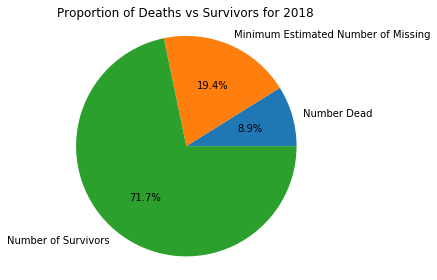

In [998]:
# plotting proportion of deaths vs survivors for 2018

plt.pie(
    Deaths1_2018[0],
    labels=Deaths1_2018['level_0'],
    autopct='%1.1f%%',
    )
# View the plot drop above
plt.axis('equal')

# View the plot
plt.title("Proportion of Deaths vs Survivors for 2018")
plt.tight_layout()

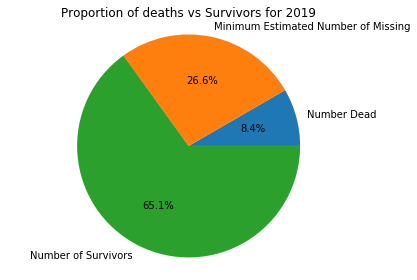

In [999]:
# plotting proportion of deaths vs survivors for 2019

plt.pie(
    Deaths1_2019[0],
    labels=Deaths1_2019['level_0'],
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')

# View the plot
plt.title("Proportion of deaths vs Survivors for 2019")
plt.tight_layout()


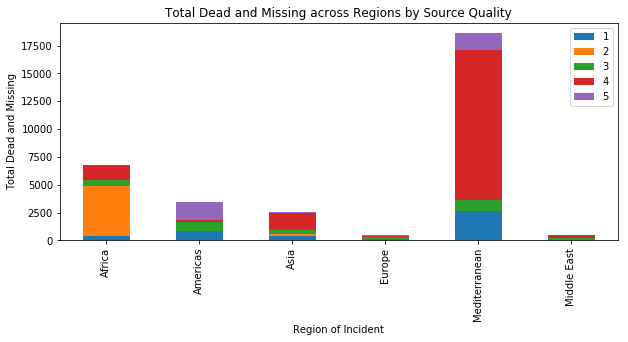

In [1000]:
#BEGIN Changed legend values and stacked=true in plot
dfnew=df.groupby(['Region of Incident - Grouped','Source Quality']).agg({"Total Dead and Missing" : [sum]})
graph=dfnew.unstack().plot(kind = 'bar', stacked=True,figsize = (10,4), width = 0.5, title = "Total Dead and Missing across Regions by Source Quality")

#END


graph.set_xlabel("Region of Incident")
graph.set_ylabel("Total Dead and Missing")
#BEGIN Changed legend values and stacked=true in plot
graph.legend(['1','2','3','4','5']).set_visible(True)


#END


Text(0, 0.5, 'Latitude')

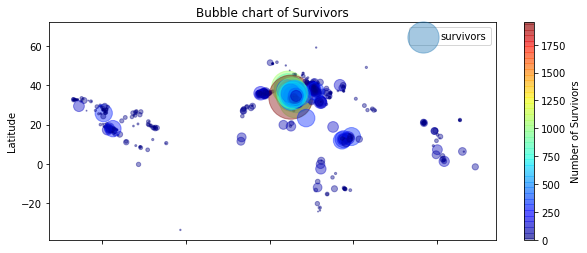

In [1001]:
# scatter plot
scatter = df.plot(kind = 'scatter', x = "longitude", y = "latitude", s= df['Number of Survivors'], label = 'survivors'
        , c = "Number of Survivors", cmap=plt.get_cmap("jet"),title = "Bubble chart of Survivors",
       colorbar = True,alpha = 0.4, figsize = (10,4),)
scatter.set_xlabel("Longitude")
scatter.set_ylabel("Latitude")

In [1002]:
import folium 
from folium import plugins
from folium.plugins import HeatMap
init_notebook_mode(connected=True)

mapchart=df.dropna(subset=['latitude']) #drop it
mapchart = df.dropna(subset=['longitude'])

incident_map = folium.Map(location = [mapchart['latitude'].mean(), mapchart['longitude'].mean()], zoom_start = 1)
lat_long_data = mapchart[['latitude','longitude']].values.tolist()
cluster_map = folium.plugins.FastMarkerCluster(lat_long_data).add_to(incident_map)
incident_map

In [1003]:
# Trends of deaths by months 
#BEGIN Changed legend values and stacked=true in plot
dfnew=df.groupby(['Region of Incident - Grouped','Source Quality']).agg({"Total Dead and Missing" 
                                                            : [sum]}).rename({"sum": ""}).reset_index()


In [1006]:
# Percentage of Dead and Survived across Each Route
df['Migration Route - New'] = df['Migration Route'].fillna(df['Region of Incident - Grouped'] + '- Others')
df1 = df.groupby(['Migration Route - New']).agg({"Total Dead and Missing" : [sum], "Number of Survivors": [sum]}).reset_index().rename(columns = {"sum" : " "})
df1['Total Dead and Survivors'] = df1['Total Dead and Missing']+df1['Number of Survivors']
df1['Total Dead and Missing - New'] = df1['Total Dead and Missing']
df1['Number of Survivors - New'] = df1['Number of Survivors']
df1.loc[df1['Total Dead and Missing - New'] <= 100, "Migration Route - New"] = "Others"

In [1007]:
from __future__ import division
df1 = df1.groupby(['Migration Route - New']).agg({"Total Dead and Missing - New" : [sum]
                            , "Number of Survivors - New": [sum]
                            , "Total Dead and Survivors" : [sum]}).reset_index().rename(columns = {"sum" : " "})
df1 = df1.rename(columns = {'Migration Route - New' :'Migration Route' 
                            ,'Total Dead and Missing - New': 'Total Dead and Missing'
                            ,'Number of Survivors - New': 'Number of Survivors'})
df1['Pct Dead&Missing'] = round((df1['Total Dead and Missing']*100).divide(df1['Total Dead and Survivors']
                                                                           , axis = 'rows'),0).astype('int64')
df1['Pct Survived'] = round((df1['Number of Survivors']*100).divide(df1['Total Dead and Survivors']
                                                                    , axis = 'rows'),0).astype('int64')
df1 = df1.sort_values(by = ['Pct Dead&Missing'])
df1

,Migration Route,Total Dead and Missing,Number of Survivors,Total Dead and Survivors,Pct Dead&Missing,Pct Survived
,,,,,,
7,Horn Africa to Yemen,357,1133.0,1490.0,24,76
4,Central Mediterranean,15488,34970.0,50458.0,31,69
12,Western Mediterranean,1527,3006.0,4533.0,34,66
5,Eastern Mediterranean,1585,2894.0,4479.0,35,65
11,Western Balkans,121,185.0,306.0,40,60
1,Americas- Others,795,1007.0,1802.0,44,56
8,Middle East- Others,461,569.0,1030.0,45,55
10,Western African,239,234.0,473.0,51,49
6,Europe- Others,276,157.0,433.0,64,36


Text(0, 0.5, 'Percentage')

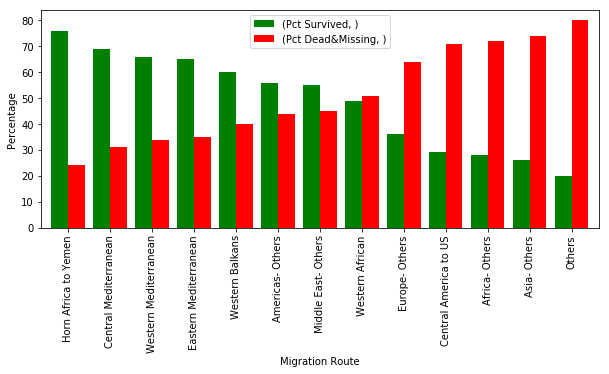

In [1008]:
graph = df1.plot.bar(x = 'Migration Route', y= ['Pct Survived','Pct Dead&Missing'], figsize = [10,4], width = 0.8, color =['green','red'])
graph.legend()
graph.set_xlabel("Migration Route")
graph.set_ylabel("Percentage")

In [1036]:
# K Means Clustering  
import scipy as sp 
from numpy import vstack
from numpy.random import rand
from scipy.cluster.vq import kmeans, vq , whiten
from sklearn import preprocessing

# Dropping the null value columns
data = df.dropna(subset = ["longitude", "latitude"])

# Considering columns required for the analysis
test = data[['longitude', 'latitude','Total Dead and Missing','Number of Survivors']]
# Scaling the data
scaler = preprocessing.StandardScaler()
test = scaler.fit_transform(test)

TypeError: 'str' object is not callable

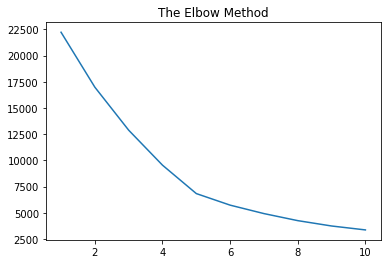

In [1031]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300)
    kmeans.fit(test)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [1032]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5)
y_kmeans = kmeans.fit_predict(test)

# Merging the clustered array with the main dataset for further analysis 
clustereddata = pd.DataFrame({'Cluster': []})
clustereddata['Cluster'] = y_kmeans

clustereddata = pd.concat([clustereddata, data], axis =1)

In [1033]:
#plotting clusters on geo map

import plotly.graph_objects as go

fig = go.Figure(data=go.Scattergeo(
        lon = clustereddata['longitude'],
        lat = clustereddata['latitude'],
        mode = 'markers',
        marker_color = clustereddata['Cluster'],
        ))
fig.show()

In [1034]:
import plotly.express as px
fig = px.scatter_geo(clustereddata, lat = "latitude", lon = "longitude",
                     color="Cluster", # which column to use to set the color of markers
                     hover_name="Region of Incident", # column added to hover information
                    # size="pop", # size of markers
                     projection="natural earth")
fig.show()


In [1013]:
# Cross tabulation of Region of Incident and Cause of Death 
crosstab = pd.crosstab(df['Region of Incident - Grouped'], df['Cause of Death - Grouped']
                       , values=df['Total Dead and Missing'], aggfunc='sum',margins=True
                       , margins_name='Total').fillna(0)
crosstab.sort_values(by = ['Total'], ascending = False)

Cause of Death - Grouped,Accident,Asphyxiation,Dehydration/Starvation,Drowning,Harsh Weather,Killed,Lack of medicines,Mixed,Others,Unknown,Total
Region of Incident - Grouped,,,,,,,,,,,
Total,1575.0,354.0,878.0,20606.0,434.0,806.0,1841.0,2908.0,781.0,2172.0,32355
Mediterranean,5.0,175.0,10.0,17098.0,84.0,20.0,24.0,116.0,258.0,810.0,18600
Africa,736.0,97.0,804.0,1434.0,87.0,433.0,1716.0,946.0,303.0,238.0,6794
Americas,382.0,3.0,42.0,1036.0,172.0,77.0,6.0,737.0,112.0,896.0,3463
Asia,187.0,1.0,22.0,861.0,1.0,122.0,13.0,1096.0,65.0,212.0,2580
Middle East,98.0,0.0,0.0,74.0,69.0,122.0,79.0,1.0,16.0,2.0,461
Europe,167.0,78.0,0.0,103.0,21.0,32.0,3.0,12.0,27.0,14.0,457


In [926]:
# Cross tabulation of Region of Incident and Cause of Death 
crosstab = pd.crosstab(df['Region of Incident - Grouped'], df['Migration Route - New'], values=df['Total Dead and Missing'], aggfunc='sum',margins=True, margins_name='Total').fillna(0)
crosstab.sort_values(by = ['Total'], ascending = False)


Migration Route - New,Africa- Others,Americas- Others,Asia- Others,Calais to United Kingdom,Caribbean to Central America,Central America to US,Central Mediterranean,Darien Gap,Dominican Republic to Puerto Rico,Eastern Mediterranean,...,"From Haiti to Dajabon, Dominican Republic",Horn Africa to Yemen,Italy to France,Malaysia to Indonesia,Middle East- Others,Venezuela to Curaçao,Western African,Western Balkans,Western Mediterranean,Total
Region of Incident - Grouped,,,,,,,,,,,,,,,,,,,,,
Total,6198.0,795.0,2567.0,51.0,21.0,2600.0,15488.0,28.0,13.0,1585.0,...,1.0,357.0,9.0,13.0,461.0,5.0,239.0,121.0,1527.0,32355
Mediterranean,0.0,0.0,0.0,0.0,0.0,0.0,15488.0,0.0,0.0,1585.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1527.0,18600
Africa,6198.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,357.0,0.0,0.0,0.0,0.0,239.0,0.0,0.0,6794
Americas,0.0,795.0,0.0,0.0,21.0,2600.0,0.0,28.0,13.0,0.0,...,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,3463
Asia,0.0,0.0,2567.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,2580
Middle East,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,461.0,0.0,0.0,0.0,0.0,461
Europe,0.0,0.0,0.0,51.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,9.0,0.0,0.0,0.0,0.0,121.0,0.0,457


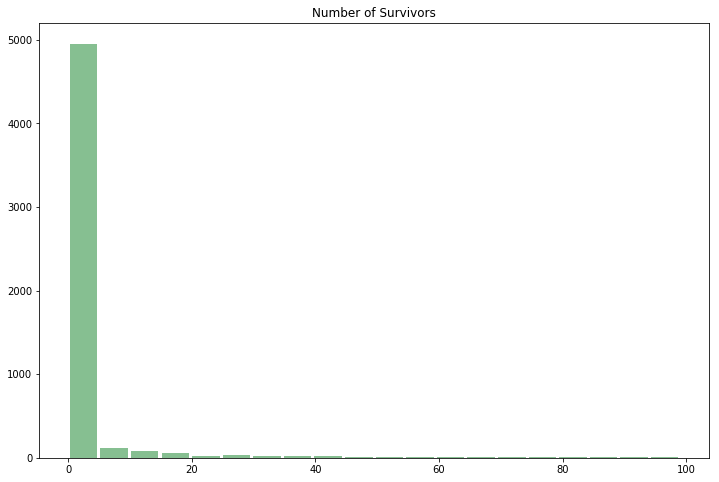

In [940]:
# Histogram 

graph = df[df['Number of Survivors'] < 100]
ax = graph.hist(column='Number of Survivors', bins=20, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)


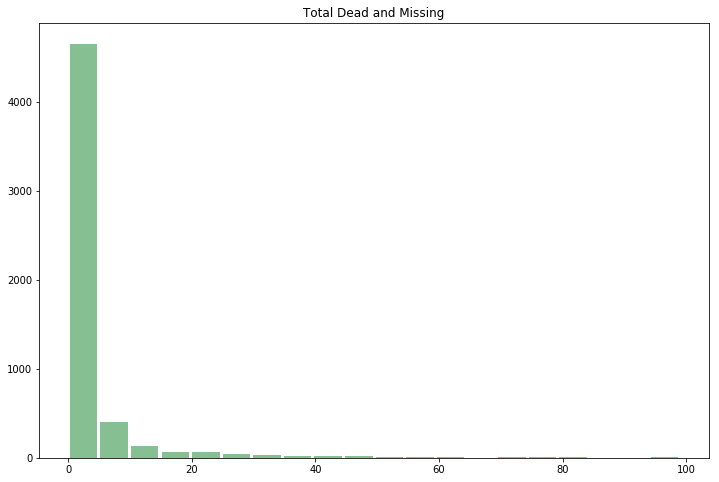

In [937]:
# Histogram after removing outliers

histogram = df[df['Total Dead and Missing'] < 100]

histplot = histogram.hist(column='Total Dead and Missing', bins=20, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

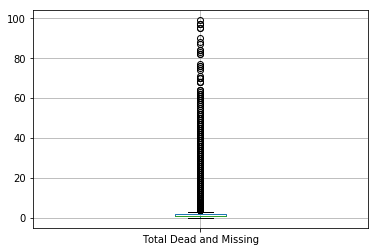

In [939]:
histogram.boxplot('Total Dead and Missing')